In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import datetime
import os

import locale 

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [4]:
locale.setlocale(locale.LC_TIME, "es_ES");

In [5]:
plt.rcParams['figure.figsize'] = (10, 4)

# Inicio 

In [6]:
HOME=os.environ['HOME']   
f = open(HOME+'/.env', 'r')
for line in f.readlines():
    Name=line.strip().split('=')[0]
    Content=line.strip().split('=')[-1]
    if Name=='dirData' or Name=='dirAnalisis':
        exec(Name + "=" + "'" + Content + "'")
f.close()

In [7]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    imagesDir   = dirAnalisis + '/SSTGlobalAnalysis/images'
    analisisDir = dirAnalisis + '/SSTGlobalAnalysis'    
elif os.uname().nodename.lower().find('sagams') != -1:
    imagesDir   = dirAnalisis + '/SSTGlobalAnalysis/images'
    analisisDir = dirAnalisis + '/SSTGlobalAnalysis'
elif os.uname().nodename.lower().find('rossby') != -1:
    imagesDir   = dirAnalisis + '/SSTGlobalAnalysis/images'
    analisisDir = dirAnalisis + '/SSTGlobalAnalysis'

In [8]:
Titulos = ['Oceano Global','Hemisferio norte','Hemisferio sur','AtlanticoNorte', 'Demarcación marina levantino-balear', 'Demarcación marina noratlántica','Demarcación marina canaria','Demarcación sudatlántica','Demarcación Estrecho y Alborán','Iberian Canary Basin']
Titulos_short = ['GO','NH','SH','NAtl','LEB', 'NOR','CAN','SUD','ESA','IBICan']

In [15]:
it=6

In [16]:
titulo = Titulos[it]
titulo_short = Titulos_short[it]
print(titulo)

Demarcación marina canaria


In [17]:
Title  = 'Anomalía de temperatura superficial en el '+ titulo
FileIn =  analisisDir+'/data/sstLD_anom_'+titulo_short+'.nc'
FileOut = analisisDir+'/images/map_sstd_anom_'+titulo_short+'.png'

In [18]:
data = xr.open_dataset(FileIn)
sst = data.sst

# Figura

In [19]:
escalaLand='50m'
if titulo_short == 'NH':
     escalaLand='110m'
elif titulo_short == 'SH':
     escalaLand='110m'
elif titulo_short == 'GO':
     escalaLand='110m'

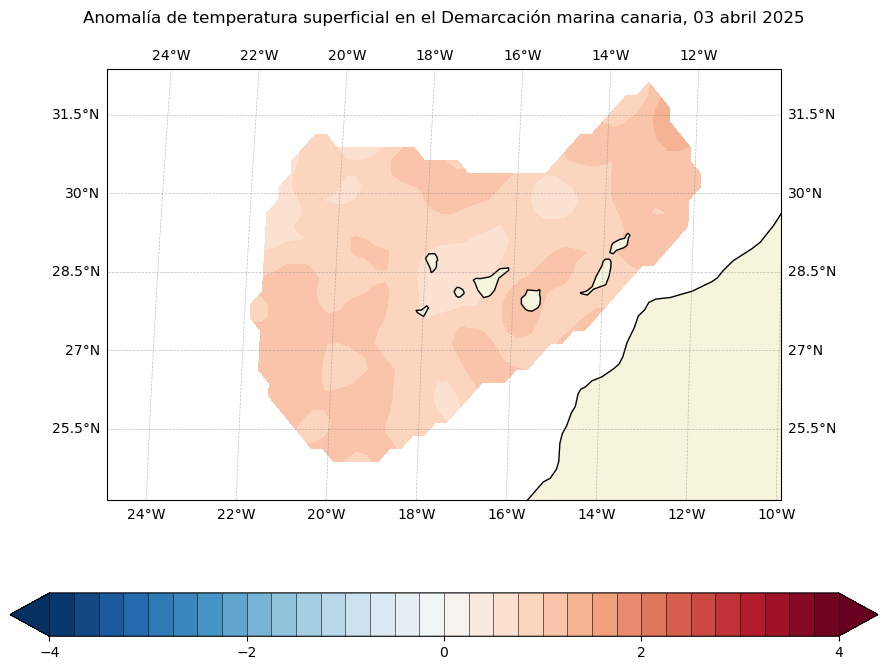

In [20]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = escalaLand ,
                facecolor=cfeature.COLORS['land'])
ax.add_feature(land, facecolor='beige')
    
cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-4,4.1,0.25), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -4,vmax = 4,extend='both')

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=[-4,-2,0,2,4], 
                  drawedges=True)

ax.gridlines(draw_labels=True, linewidth=.5,color='gray', alpha=0.5, linestyle='--')
ax.set_title(Title + ', ' + sst.time.dt.strftime("%d %B %Y").values + '\n');

plt.savefig(FileOut)
plt.savefig(FileOut)